In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/Kaggle/covid19'

/content/gdrive/MyDrive/Kaggle/covid19


In [ ]:
import pandas as pd
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [ ]:
idx_korea = (confirmed_df['Country/Region']=='Korea, South')
confirmed_korea_df = confirmed_df[idx_korea]

In [ ]:
confirmed_korea_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,...,115926,116661,117458,118243,118887,119387,119898,120673,121351,122007,122634,123240,123728,124269,124945,125519,126044,126745,127309,127772,128283,128918,129633,130380,131061,131671,132290,132818,133471,134117,134678,135344,135929,136467,136983,137682,138311,138898,139431,139910


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

confirmed_korea_np = np.array(confirmed_korea_df)
confirmed_korea_np = confirmed_korea_np[:,4:]

In [ ]:
confirmed_korea_np.shape

(1, 494)

([<matplotlib.axis.XTick at 0x7f4b2e49ab50>,
 [Text(0, 0, '1/22/20'),
  Text(0, 0, '5/1/20'),
  Text(0, 0, '8/9/20'),
  Text(0, 0, '11/17/20'),
  Text(0, 0, '2/25/21')])

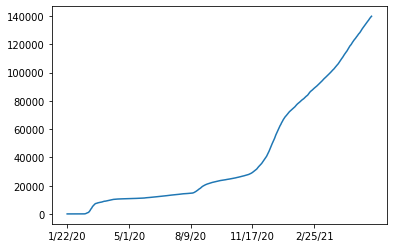

In [ ]:
plt.plot(confirmed_korea_np[0,:])

label_x = confirmed_korea_df.columns.values[4:]

sel_ids = range(0,len(label_x),100)
plt.xticks(sel_ids,labels=label_x[sel_ids])

In [ ]:
#누적 사망자 수
idx_korea = (deaths_df['Country/Region']=='Korea, South')
deaths_korea_df = deaths_df[idx_korea]

deaths_korea_np=np.array(deaths_korea_df)
deaths_korea_np=deaths_korea_np[:,4:]

#누적 회복자 수
idx_korea = (recovered_df['Country/Region']=='Korea, South')
recovered_korea_df = recovered_df[idx_korea]

recovered_korea_np=np.array(recovered_korea_df)
recovered_korea_np=recovered_korea_np[:,4:]

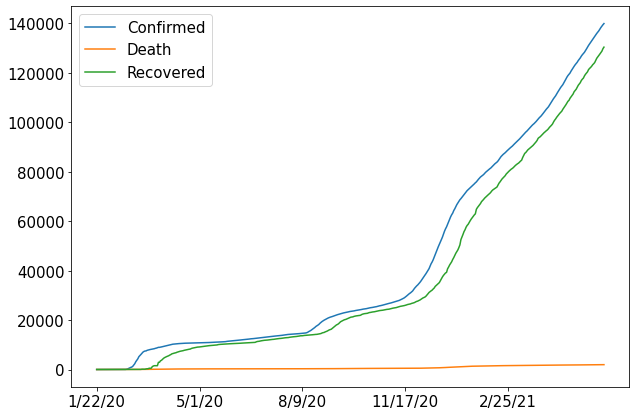

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(confirmed_korea_np[0,:])
plt.plot(deaths_korea_np[0,:])
plt.plot(recovered_korea_np[0,:])

label_x = confirmed_korea_df.columns.values[4:]

sel_ids = range(0,len(label_x),100)

plt.xticks(sel_ids,labels=label_x[sel_ids],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Confirmed','Death','Recovered'],fontsize=15)

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ]),
 <a list of 8 Text major ticklabel objects>)

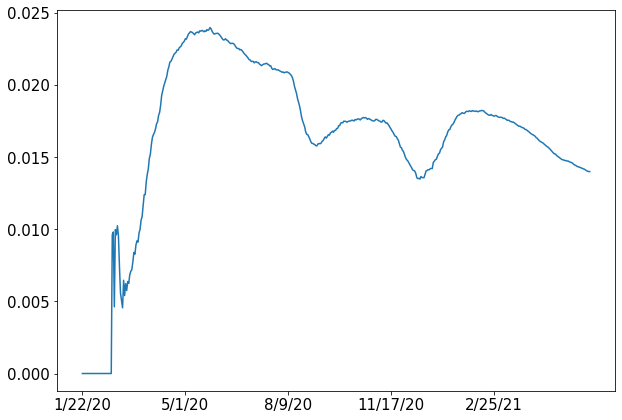

In [ ]:
plt.figure(figsize=(10,7))
recovered2confirmed_ratio = deaths_korea_np[0,:]/ confirmed_korea_np[0,:]

plt.plot(recovered2confirmed_ratio)

label_x = confirmed_korea_df.columns.values[4:]

sel_ids = range(0,len(label_x),100)

plt.xticks(sel_ids,labels=label_x[sel_ids],fontsize=15)
plt.yticks(fontsize=15)


In [ ]:
idx_max = np.argmax(recovered2confirmed_ratio)

print(f'사망자/확진자 비율이 최대인 일자는 : {label_x[idx_max]} 이며')
print(f'해당 일자의 값은 {recovered2confirmed_ratio[idx_max]:.3f}입니다')

사망자/확진자 비율이 최대인 일자는 : 5/25/20 이며
해당 일자의 값은 0.024입니다


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/Kaggle/covid19/covid_19_data.csv')

data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [7]:
#Province/State 에 null 값이 있어서 , unknown으로 채워준다.
data['Province/State'] = data['Province/State'].fillna("Unknown")

In [8]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
data['Province/State'].values

array(['Anhui', 'Beijing', 'Chongqing', ..., 'Zhejiang',
       'Zhytomyr Oblast', 'Zuid-Holland'], dtype=object)

In [15]:
#Province or State 항목을 수치화
num_data=data
num_data['Province/State'] = data['Province/State'].astype('category').cat.codes

In [16]:
num_data['Province/State'].values

array([ 24,  60, 124, ..., 734, 735, 736], dtype=int16)

In [27]:
print("Confirmed min : "+ str(min(data['Confirmed']))+"    Max :"+str(max(data['Confirmed'])))
print("Deaths    min : " + str(min(data['Deaths']))+"       Max :"+str(max(data['Deaths'])))
print("Recovered min : "+str(min(data['Recovered']))+"    Max :"+str(max(data['Recovered'])))

Confirmed min : -302844.0    Max :5863138.0
Deaths    min : -178.0       Max :112385.0
Recovered min : -854405.0    Max :6399531.0


In [28]:
#데이터 정규화
num_data['Confirmed'] = (data['Confirmed']-min(data['Confirmed'])) / (max(data['Confirmed'])-min(data['Confirmed']))
num_data['Deaths'] = (data['Deaths']-min(data['Deaths'])) / (max(data['Deaths'])-min(data['Deaths']))
num_data['Recovered'] = (data['Recovered']-min(data['Recovered'])) / (max(data['Recovered'])-min(data['Recovered']))

In [30]:
print("Confirmed min : "+ str(min(data['Confirmed']))+"    Max :"+str(max(data['Confirmed'])))
print("Deaths    min : " + str(min(data['Deaths']))+"       Max :"+str(max(data['Deaths'])))
print("Recovered min : "+str(min(data['Recovered']))+"    Max :"+str(max(data['Recovered'])))

Confirmed min : 0.0    Max :1.0
Deaths    min : 0.0       Max :1.0
Recovered min : 0.0    Max :1.0
